# **CodeSoft Ml internship task2** #
Credit Card fraud-detection

# **import libraries** #

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler ,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix


# **load the data** #

In [3]:
# train dataset

data_train=pd.read_csv('D:/codesoft/task2/fraudTrain.csv')
print("the details of trained data: \n")
print("the describe of train data= \n")
data_train.describe().style.background_gradient()

the details of trained data: 

the describe of train data= 



,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,648337.000000,417192042079726656.000000,70.351035,48800.671097,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465,0.005789
std,374317.974488,1308806447000240384.000000,160.316039,26893.222476,5.075808,13.759077,301956.360689,12841278.423359,5.109788,13.771091,0.075863
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000
25%,324168.500000,180042946491150.000000,9.650000,26237.000000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276,0.000000
50%,648337.000000,3521417320836166.000000,47.520000,48174.000000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392,0.000000
75%,972505.500000,4642255475285942.000000,83.140000,72042.000000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236796,0.000000
max,1296674.000000,4992346398065154048.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902,1.000000


In [4]:
print("the info of train data= \n")
data_train.info()
print ("\n")
print("the null data= \n")
data_train.isnull().sum()
data_train.dropna(inplace=True)

the info of train data= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float

In [5]:
data_train.head(11).style.background_gradient()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.630000,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.375000,-75.204500,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.540000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.650000,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.843200,-78.600300,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.270000,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.335900,-79.660700,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.390000,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.522000,-87.349000,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
# test dataset

data_test=pd.read_csv('D:/codesoft/task2/fraudTest.csv')
print("the details of test data: \n")
print("the describe of test data= \n")
data_test.describe().style.background_gradient(cmap='Greens')



the details of test data: 

the describe of test data= 



,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,277859.000000,417838695528764096.000000,69.392810,48842.628015,38.543253,-90.231325,88221.887918,1380678865.166780,38.542798,-90.231380,0.003860
std,160422.401459,1309836622980612608.000000,156.745941,26855.283328,5.061336,13.721780,300390.892061,5201104.065916,5.095829,13.733071,0.062008
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1371816865.000000,19.027422,-166.671575,0.000000
25%,138929.500000,180042946491150.000000,9.630000,26292.000000,34.668900,-96.798000,741.000000,1376028627.500000,34.755302,-96.905129,0.000000
50%,277859.000000,3521417320836166.000000,47.290000,48174.000000,39.371600,-87.476900,2408.000000,1380761988.000000,39.376593,-87.445204,0.000000
75%,416788.500000,4635330563105903.000000,83.010000,72011.000000,41.894800,-80.175200,19685.000000,1385866984.000000,41.954163,-80.264637,0.000000
max,555718.000000,4992346398065154048.000000,22768.110000,99921.000000,65.689900,-67.950300,2906700.000000,1388534374.000000,66.679297,-66.952026,1.000000


In [7]:
print("the info of test data= \n")
data_test.info()
print ("\n")
print("the null data= \n")
data_test.isnull().sum()
data_test.dropna(inplace=True)

the info of test data= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long       

In [8]:
data_test.tail().style.background_gradient()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770000,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.493100,-91.891200,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840000,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.039300,-95.440100,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880000,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.196600,-118.901700,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990000,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.625500,-116.449300,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.130000,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.666500,-97.479800,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


# **Data visualization** # 

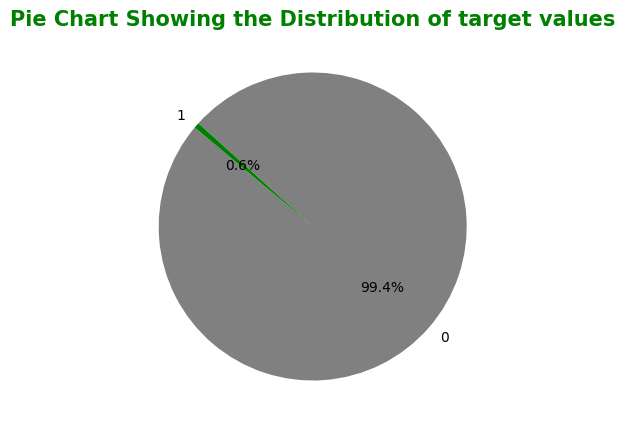

In [9]:
# working on target values

dist_data=data_train['is_fraud'].value_counts()
dist_labels=dist_data.index
plt.figure(figsize=(8,5))
plt.pie(x=dist_data ,labels=dist_labels , colors= ["gray", "green"],startangle=140, autopct='%1.1f%%')
plt.title("Pie Chart Showing the Distribution of target values", fontdict={"size": 15, "color": "green", "weight": "bold"})

plt.show()

In [10]:
print("from the previous chart show that all target =0 \n")

from the previous chart show that all target =0 



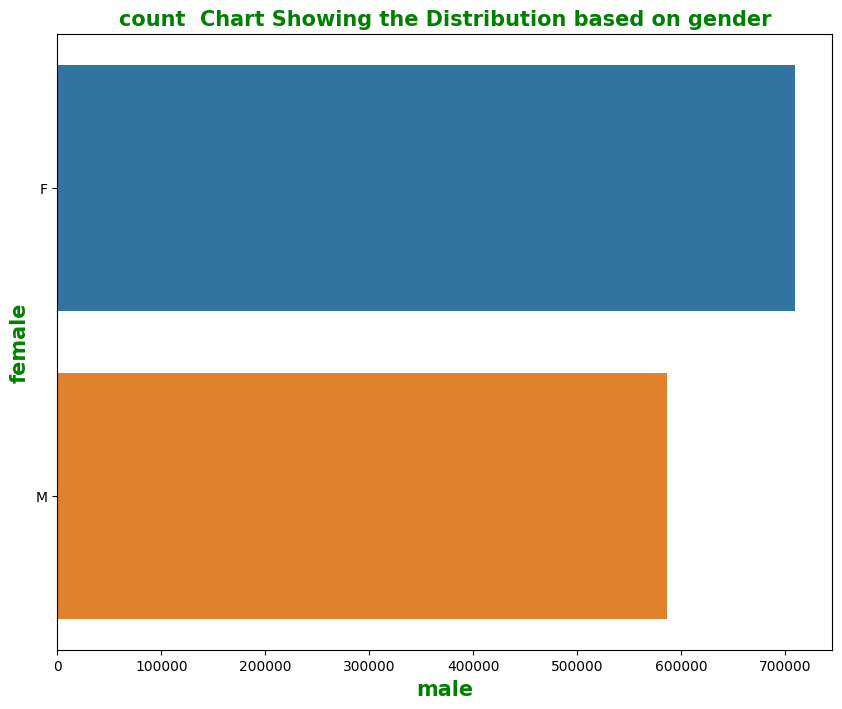

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data=data_train , y='gender',order=data_train['gender'].value_counts().index)
plt.xlabel("male",fontdict={"size": 15, "color": "green", "weight": "bold"})
plt.ylabel("female",fontdict={"size": 15, "color": "green", "weight": "bold"})
plt.title("count  Chart Showing the Distribution based on gender", fontdict={"size": 15, "color": "green", "weight": "bold"})
plt.show()

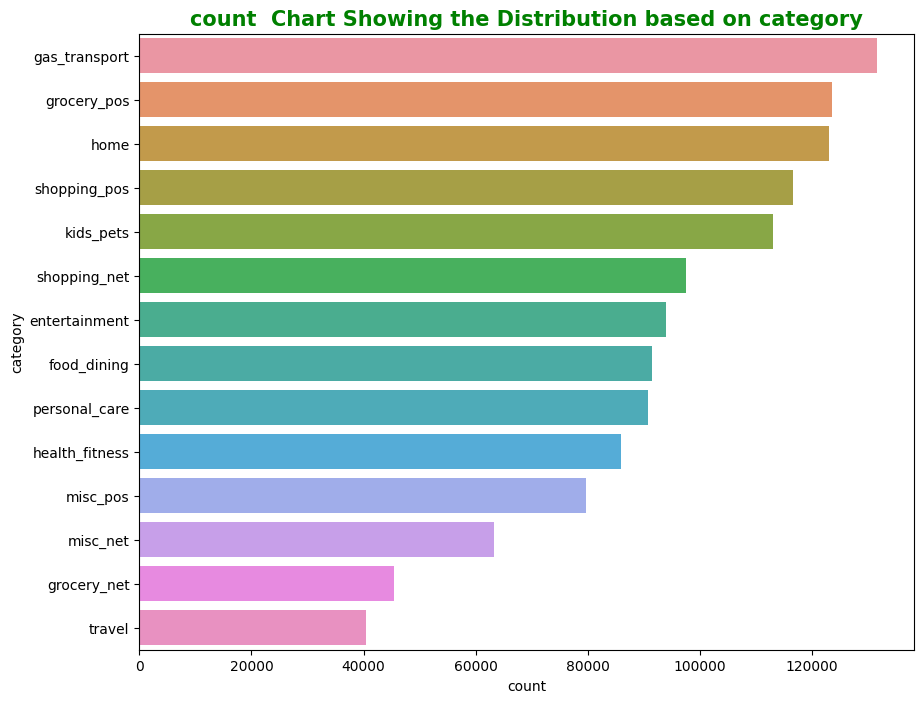

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=data_train , y='category',order=data_train['category'].value_counts().index)
plt.title("count  Chart Showing the Distribution based on category", fontdict={"size": 15, "color": "green", "weight": "bold"})
plt.show()

# **encode the string data to be ready for using in training** #

In [13]:
one_hot=OneHotEncoder(drop='first')
encode_cat_col= ['gender', 'category', 'state']
encoded_train_features = one_hot.fit_transform(data_train[encode_cat_col]).toarray()
encoded_test_features =one_hot.transform(data_test[encode_cat_col]).toarray()

# **apply stander scaler on numerical data** #

In [14]:
st=StandardScaler()
num_col=['amt','zip','lat','long','city_pop','merch_lat','merch_long']
train_scale=st.fit_transform(data_train[num_col])
test_scale=st.transform(data_test[num_col])

In [15]:
# detect target values
target_train=data_train['is_fraud']
target_test=data_test['is_fraud']

# **prepare data for ml algorithm training** #

In [16]:
train=pd.concat([(pd.DataFrame(encoded_train_features)) ,(pd.DataFrame(train_scale))],axis=1)
test=pd.concat([(pd.DataFrame(encoded_test_features)) ,(pd.DataFrame(test_scale))],axis=1)


# **Shuffel the data to prevent overfitting occur** #

In [27]:
X_shuffled, y_shuffled = shuffle(train, target_train, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled ,y_shuffled, test_size=0.5, random_state=42 ,stratify=y_shuffled)

# **applying DecisionTreeClassifier algorithm** #

In [29]:
rf= DecisionTreeClassifier(random_state=42 ,max_depth=5)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_validation)
rf_accuracy = accuracy_score(y_validation, y_predict)
print("DecisionTreeClassifier Accuracy: {:.3f}%".format(rf_accuracy * 100))
print("\n")

class_report=classification_report(y_validation,y_predict)
print(class_report)

DecisionTreeClassifier Accuracy: 99.661%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    644585
           1       0.79      0.56      0.66      3753

    accuracy                           1.00    648338
   macro avg       0.90      0.78      0.83    648338
weighted avg       1.00      1.00      1.00    648338



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


the confusion matrix from model= 



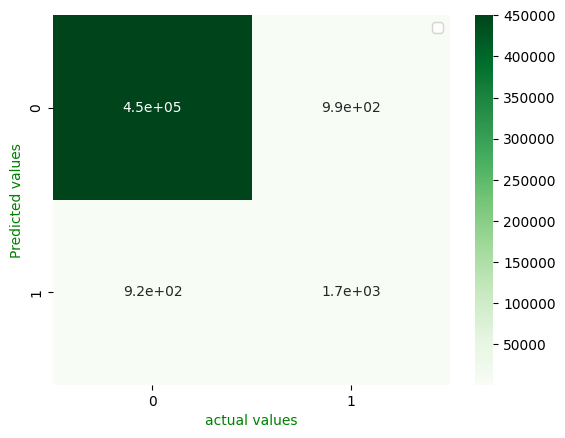

In [23]:
# confusion matrix 
print("the confusion matrix from model= \n")
cm=confusion_matrix(y_validation, y_predict)
sns.heatmap(cm,annot=True,cmap="Greens")
plt.xlabel("actual values" ,fontdict={"size":10,"color":"green"})
plt.ylabel("Predicted values",fontdict={"size":10,"color":"green"})
plt.legend()
plt.show()

# **Thanks to listen** #
# *Omar Mohamed* #